## DBSCAN Homework

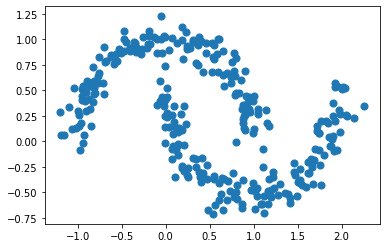

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y_true = make_moons(n_samples=300, noise = 0.1, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

## Task1: Implement DBSCAN algorithm (without using sklearn)

In [2]:
import numpy as np
from sklearn.metrics import pairwise_distances

class DBScan:
    
    def __init__(self, eps = 0.5, minpts = 4):
        self.eps = eps
        self.minpts = minpts
        self.clusters = None
    
    def fit(self, X):
        cluster = 0
        self.clusters = np.array([-1] * len(X))
        self.W = pairwise_distances(X)
        for i, x in enumerate(X):
            if self.label(i, X) == "Noise":
                self.clusters[i] = -2
        while True:
            try:
                i = np.random.choice(np.where(self.clusters == -1)[0])
                if self.isHighDensity(i, X):
                    self.hasbeenselected = set()
                    for index in self.createCluster(i, X):
                        self.clusters[index] = cluster
                    cluster += 1
            except:
                break
    
    def isHighDensity(self, i, X):
        k = 0
        for j, y in enumerate(X):
            if self.W[i, j] < self.eps:
                k += 1
                if k >= self.minpts:
                    return True
        return False
    
    def label(self, i, X):
        if self.isHighDensity(i, X):
            return "Core"
        else:
            for j, y in enumerate(X):
                if self.W[i, j] < self.eps and self.isHighDensity(j, X):
                    return "Border"
            return "Noise"
    
    # depth first search
    def createCluster(self, i, X):
        cluster = []
        cluster.append(i)
        self.hasbeenselected.add(i)
        for j, y in enumerate(X):
            if self.W[i, j] < self.eps and not (j in self.hasbeenselected):
                cluster.append(j)
                self.hasbeenselected.add(j)
                if self.isHighDensity(j, X):
                    cluster.extend(self.createCluster(j, X))
        return cluster

## Task2: Execute DBSCAN on the given data and find good hyperparameters to have a good clustering. Draw the resulting clusters

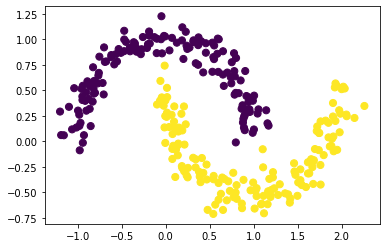

In [5]:
dbscan = DBScan(eps = 0.22, minpts = 7)
dbscan.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=dbscan.clusters, s=50, cmap='viridis')

## Optional Task: Try it on other types of data

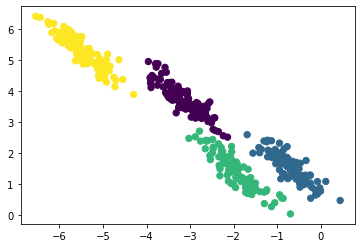

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))
X = X_stretched
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=40, cmap='viridis')

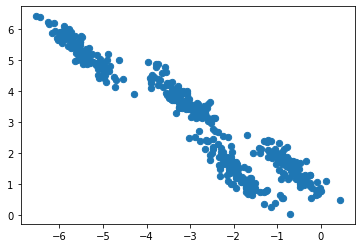

In [19]:
plt.scatter(X[:, 0], X[:, 1], s=40, cmap='viridis')

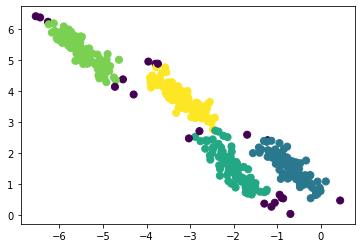

In [24]:
dbscan = DBScan(eps = 0.3, minpts = 10)
dbscan.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=dbscan.clusters, s=50, cmap='viridis')